In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("links.csv")
df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
movies_title=pd.read_csv('movies.csv')
movies_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
Rating=pd.read_csv('ratings.csv')


In [5]:
Rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#merge the two datasets

In [6]:
data=pd.merge(Rating,movies_title,on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [8]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [9]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['No of Ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,No of Ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


## Data checking

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<AxesSubplot:>

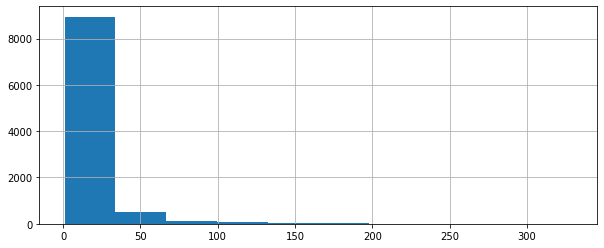

In [11]:
plt.figure(figsize=(10,4))
ratings['No of Ratings'].hist(bins=10)




<AxesSubplot:>

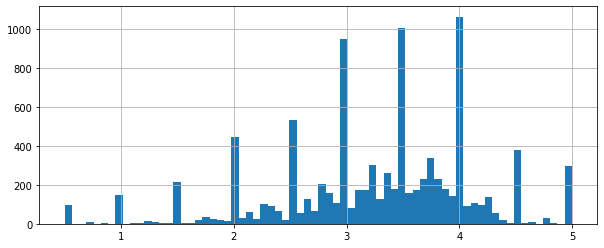

In [12]:
plt.figure(figsize =(10, 4)) 

ratings['rating'].hist(bins=70) 


<AxesSubplot:xlabel='rating', ylabel='count'>

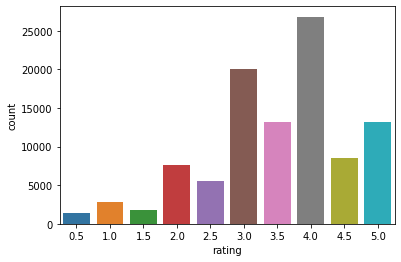

In [13]:
sn.countplot(x="rating" ,data=data)

<AxesSubplot:>

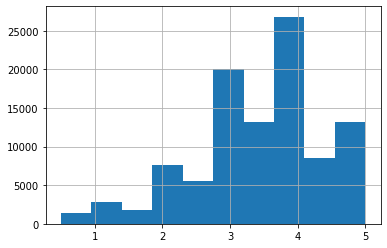

In [14]:
data["rating"].hist()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 7.4+ MB


## Data checking if it is null or not

In [16]:
data.isnull()

,userId,movieId,rating,timestamp,title,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
100831,False,False,False,False,False,False
100832,False,False,False,False,False,False
100833,False,False,False,False,False,False
100834,False,False,False,False,False,False


In [17]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [18]:
moviemat=pd.pivot_table(index='userId',columns="title",values="rating", data=data)
moviemat.head()
moviemat.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [19]:
moviemat["xXx (2002)"]

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), Length: 610, dtype: float64

In [20]:
xxx_2002_rating=moviemat['xXx (2002)']
xxx_2002_rating.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

In [21]:
xxx_2002_similarmovies=moviemat.corrwith(xxx_2002_rating)
xxx_2002_similarmovies

c:\users\sager\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\sager\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.762493
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.500000
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

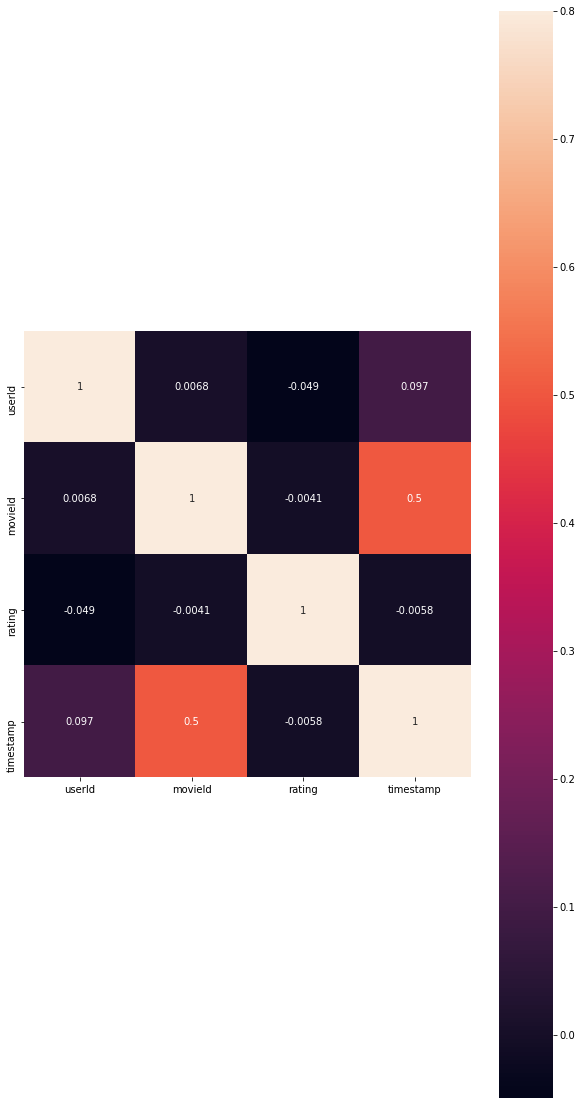

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,20))
corr_matrice=data.corr()
sn.heatmap(corr_matrice,annot=True,vmax=.8,square=True)
plt.show()


In [23]:
xxx_2002_corr=pd.DataFrame(xxx_2002_similarmovies,columns=['correlation'])
xxx_2002_corr.dropna(inplace=True)
xxx_2002_corr

,correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325
...,...
[REC]² (2009),-1.000000
eXistenZ (1999),0.762493
xXx (2002),1.000000


 xXx (2002) after thise movies our system reccomand the 10 Items or Less (2006).